# Online Retail Customer Churn Model
### Project by Gargi Singh

[Dataset](https://www.kaggle.com/datasets/hassaneskikri/online-retail-customer-churn-dataset/data)

In [177]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Data Loading and Initial Inspection
data = pd.read_csv("online_retail_customer_churn.csv")

# Display the first few rows and basic information
print(data.head())
print("Dataset Shape:", data.shape)
print("Data Types:\n", data.dtypes)
print("Missing Values:\n", data.isnull().sum())
print(data.describe())

   Customer_ID  Age Gender  Annual_Income  Total_Spend  Years_as_Customer  \
0            1   62  Other          45.15      5892.58                  5   
1            2   65   Male          79.51      9025.47                 13   
2            3   18   Male          29.19       618.83                 13   
3            4   21  Other          79.63      9110.30                  3   
4            5   21  Other          77.66      5390.88                 15   

   Num_of_Purchases  Average_Transaction_Amount  Num_of_Returns  \
0                22                      453.80               2   
1                77                       22.90               2   
2                71                       50.53               5   
3                33                      411.83               5   
4                43                      101.19               3   

   Num_of_Support_Contacts  Satisfaction_Score  Last_Purchase_Days_Ago  \
0                        0                   3              

# Data Clearning 

- 2.1. Handling Missing Values
Identify and handle missing values:
If numerical columns have missing values, consider filling them with mean/median.
For categorical variables, use mode or a placeholder like "Unknown".


- 2.2. Cleaning Categorical Variables
Convert all categorical variables to a consistent format (e.g., remove extra spaces or standardize cases).
Encode categorical variables using one-hot encoding or label encoding.


- 2.3. Removing Outliers
Use boxplots and the interquartile range (IQR) method to identify and remove outliers in numerical columns.


- 2.4. Normalization and Standardization
Scale numerical columns using techniques like Min-Max Scaling (Normalization) or Standardization (Z-Score).

In [185]:
# 1. Handle Missing Values
# Fill missing numerical values with median and categorical values with mode
num_cols = data.select_dtypes(include=['float64', 'int64']).columns
cat_cols = data.select_dtypes(include=['object']).columns

data[num_cols] = data[num_cols].fillna(data[num_cols].median())
for col in cat_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

# 2. Clean Categorical Variables
# Remove extra spaces and standardize to lower case
data[cat_cols] = data[cat_cols].apply(lambda x: x.str.strip().str.lower())

# 3. One-Hot Encoding for Categorical Variables
data = pd.get_dummies(data, columns=cat_cols, drop_first=True)

# 4. Handling Outliers
# Remove outliers using IQR for numerical columns
for col in num_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    data = data[~((data[col] < (Q1 - 1.5 * IQR)) | (data[col] > (Q3 + 1.5 * IQR)))]

# 5. Feature Scaling
# Standardizing numerical columns
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])


print(data.head())
print("Dataset Shape:", data.shape)
print("Data Types:\n", data.dtypes)
print("Missing Values:\n", data.isnull().sum())
print(data.describe())


   Customer_ID       Age  Annual_Income  Total_Spend  Years_as_Customer  \
0    -1.730320  1.229628      -1.264973     0.283773          -0.854240   
1    -1.726856  1.426547      -0.614434     1.378924           0.591480   
2    -1.723391 -1.658518      -1.567145    -1.559749           0.591480   
3    -1.719927 -1.461599      -0.612162     1.408578          -1.215669   
4    -1.716463 -1.461599      -0.649460     0.108396           0.952910   

   Num_of_Purchases  Average_Transaction_Amount  Num_of_Returns  \
0         -0.962378                    1.282050       -0.902114   
1          0.965463                   -1.673359       -0.902114   
2          0.755153                   -1.483853        0.134005   
3         -0.576810                    0.994191        0.134005   
4         -0.226294                   -1.136392       -0.556741   

   Num_of_Support_Contacts  Satisfaction_Score  Last_Purchase_Days_Ago  \
0                -1.379444            0.018689               -0.516489  

# Processing & Feature Engineering

In [191]:
# Check for missing data
missing_data = data.isnull().sum()
print(missing_data[missing_data > 0])  # Only showing columns with missing values

# Filling missing numerical columns with median
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].median())

# Filling missing categorical columns with mode (most frequent value)
categorical_columns = data.select_dtypes(include=['object']).columns

for col in categorical_columns:
    if data[col].isnull().sum() > 0:
        mode_value = data[col].mode()
        if not mode_value.empty:  # Check if mode is not empty
            data[col] = data[col].fillna(mode_value.iloc[0])
        else:
            print(f"No mode found for {col}, skipping...")

# Verifying missing values have been handled
print(data.isnull().sum())

data['Spend_per_Purchase'] = data['Total_Spend'] / data['Num_of_Purchases']
data['Yearly_Spend'] = data['Total_Spend'] / data['Years_as_Customer']


Series([], dtype: int64)
Customer_ID                        0
Age                                0
Annual_Income                      0
Total_Spend                        0
Years_as_Customer                  0
Num_of_Purchases                   0
Average_Transaction_Amount         0
Num_of_Returns                     0
Num_of_Support_Contacts            0
Satisfaction_Score                 0
Last_Purchase_Days_Ago             0
Email_Opt_In                       0
Target_Churn                       0
Gender_male                        0
Gender_other                       0
Promotion_Response_responded       0
Promotion_Response_unsubscribed    0
dtype: int64


# Standardisation & Normalisation

In [192]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Scaling Numerical Features
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Verify the scaling
print("First 5 rows of scaled data:\n", data[numerical_features].head())


First 5 rows of scaled data:
    Customer_ID       Age  Annual_Income  Total_Spend  Years_as_Customer  \
0    -1.730320  1.229628      -1.264973     0.283773          -0.854240   
1    -1.726856  1.426547      -0.614434     1.378924           0.591480   
2    -1.723391 -1.658518      -1.567145    -1.559749           0.591480   
3    -1.719927 -1.461599      -0.612162     1.408578          -1.215669   
4    -1.716463 -1.461599      -0.649460     0.108396           0.952910   

   Num_of_Purchases  Average_Transaction_Amount  Num_of_Returns  \
0         -0.962378                    1.282050       -0.902114   
1          0.965463                   -1.673359       -0.902114   
2          0.755153                   -1.483853        0.134005   
3         -0.576810                    0.994191        0.134005   
4         -0.226294                   -1.136392       -0.556741   

   Num_of_Support_Contacts  Satisfaction_Score  Last_Purchase_Days_Ago  
0                -1.379444            0.018

# EDA ( Exploratory Data Anlaysis )

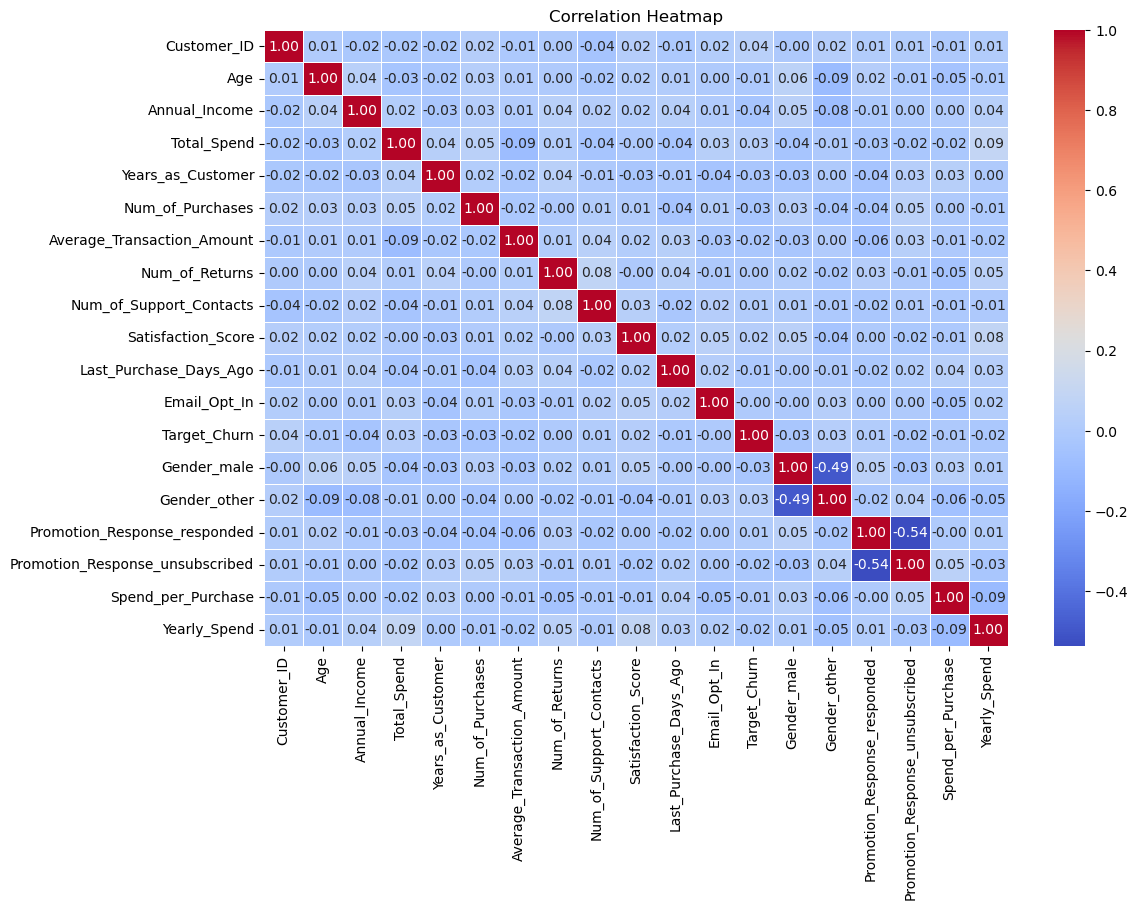

In [196]:
# EDA (Exploratory Data Analysis)
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()



# Data Splitting

In [199]:
X = data.drop(columns=['Target_Churn'])
y = data['Target_Churn']

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handling Class Imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())

# Model Building

In [198]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_res, y_train_res)

# Predicting and Evaluating the Model
y_pred = rf_model.predict(X_test)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Visualize the Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.47      0.45       135
           1       0.54      0.52      0.53       165

    accuracy                           0.50       300
   macro avg       0.49      0.49      0.49       300
weighted avg       0.50      0.50      0.50       300

